In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
import tensorflow as tf
import sklearn
from sklearn import model_selection

In [4]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = train_data.drop("label", axis=1) / 255.0
y = train_data.label

In [8]:
X_test = test_data / 255.0
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0008),
    metrics=["accuracy"]
)
history = model.fit(X_train,
                    y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_val, y_val)
                   )


Epoch 1/50
525/525 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.8534 - val_loss: 0.1390 - val_accuracy: 0.9574
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.9684 - val_loss: 0.1271 - val_accuracy: 0.9620
Epoch 3/50
525/525 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.1117 - val_accuracy: 0.9652
Epoch 4/50
525/525 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9857 - val_loss: 0.1229 - val_accuracy: 0.9660
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 0.0363 - accuracy: 0.9874 - val_loss: 0.0994 - val_accuracy: 0.9719
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 0.0328 - accuracy: 0.9889 - val_loss: 0.1022 - val_accuracy: 0.9738
Epoch 7/50
525/525 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.1070 - val_accuracy: 0.9708
Epoch 

<AxesSubplot:>

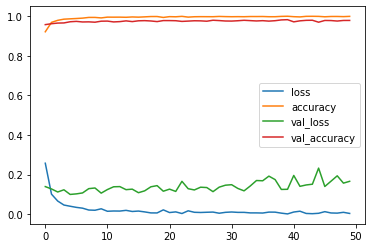

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
y_probs = model.predict(X_test)

In [22]:
y_probs

array([[3.58106031e-35, 3.39158084e-34, 1.00000000e+00, ...,
        2.09075288e-26, 5.33561212e-31, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.01678272e-35, ...,
        1.58216764e-33, 0.00000000e+00, 4.95634503e-25],
       [1.20373885e-15, 1.82427299e-14, 1.47862820e-12, ...,
        8.70549834e-13, 6.16961549e-09, 1.00000000e+00],
       ...,
       [5.34419227e-37, 7.01794225e-32, 2.29831741e-28, ...,
        2.09591710e-28, 2.02597309e-24, 4.52853688e-30],
       [2.98103314e-15, 1.32066741e-15, 1.05796209e-12, ...,
        1.99004875e-13, 1.30910855e-11, 1.00000000e+00],
       [2.91337755e-30, 3.14838557e-28, 1.00000000e+00, ...,
        3.92697562e-24, 2.78631604e-28, 6.76596296e-35]], dtype=float32)

In [23]:
y_preds=[]
for i in y_probs:
    y_preds.append(i.argmax())

In [24]:
submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")

In [25]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [26]:
submission.Label = y_preds

In [27]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [28]:
submission.to_csv("/kaggle/working/submission.csv", index=False)